In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
DATASET_PATH = "/home/ikabir/projects/ml-dl-projects/recommender-system/"

In [3]:
dataset = pd.read_csv(DATASET_PATH + "styles.csv", on_bad_lines='skip')
dataset.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch


In [4]:
dataset = dataset.query("masterCategory == 'Personal Care'")
dataset.reset_index(drop=True, inplace=True)
dataset.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,18461,Men,Personal Care,Fragrance,Deodorant,White,Spring,2017.0,Casual,David Beckham Signature Men Deos
1,56019,Women,Personal Care,Lips,Lipstick,Brown,Spring,2017.0,Casual,Colorbar Soft Touch Show Stopper Copper Lipsti...
2,43993,Women,Personal Care,Fragrance,Perfume and Body Mist,Pink,Spring,2017.0,Casual,Police Women Passion Perfume
3,56489,Women,Personal Care,Nails,Nail Polish,Bronze,Spring,2017.0,NaN,Streetwear Ash Nail Polish # 31
4,43967,Women,Personal Care,Fragrance,Perfume and Body Mist,Red,Spring,2017.0,Casual,DKNY Women Red Delicious Perfume
5,36934,Women,Personal Care,Fragrance,Perfume and Body Mist,Gold,Spring,2017.0,Casual,Giorgio Armani Women Idole Perfume
6,44187,Women,Personal Care,Fragrance,Perfume and Body Mist,White,Spring,2017.0,Casual,Nike Fragrances Women 5th Element Perfume 150 ml
7,26735,Men,Personal Care,Fragrance,Deodorant,Black,Spring,2017.0,Casual,Reebok Men Pack of 2 Pirates of the Caribbean ...
8,56026,Women,Personal Care,Lips,Lipstick,Brown,Spring,2017.0,Casual,Colorbar Soft Touch Mousse Lipstick 025
9,58980,Women,Personal Care,Fragrance,Deodorant,Pink,Spring,2017.0,Casual,Colour me Women Flowers Deo


In [5]:
dataset['image'] = dataset.apply(lambda row : str(row['id']) + ".jpg", axis=1)
dataset.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,18461,Men,Personal Care,Fragrance,Deodorant,White,Spring,2017.0,Casual,David Beckham Signature Men Deos,18461.jpg
1,56019,Women,Personal Care,Lips,Lipstick,Brown,Spring,2017.0,Casual,Colorbar Soft Touch Show Stopper Copper Lipsti...,56019.jpg
2,43993,Women,Personal Care,Fragrance,Perfume and Body Mist,Pink,Spring,2017.0,Casual,Police Women Passion Perfume,43993.jpg
3,56489,Women,Personal Care,Nails,Nail Polish,Bronze,Spring,2017.0,NaN,Streetwear Ash Nail Polish # 31,56489.jpg
4,43967,Women,Personal Care,Fragrance,Perfume and Body Mist,Red,Spring,2017.0,Casual,DKNY Women Red Delicious Perfume,43967.jpg
5,36934,Women,Personal Care,Fragrance,Perfume and Body Mist,Gold,Spring,2017.0,Casual,Giorgio Armani Women Idole Perfume,36934.jpg
6,44187,Women,Personal Care,Fragrance,Perfume and Body Mist,White,Spring,2017.0,Casual,Nike Fragrances Women 5th Element Perfume 150 ml,44187.jpg
7,26735,Men,Personal Care,Fragrance,Deodorant,Black,Spring,2017.0,Casual,Reebok Men Pack of 2 Pirates of the Caribbean ...,26735.jpg
8,56026,Women,Personal Care,Lips,Lipstick,Brown,Spring,2017.0,Casual,Colorbar Soft Touch Mousse Lipstick 025,56026.jpg
9,58980,Women,Personal Care,Fragrance,Deodorant,Pink,Spring,2017.0,Casual,Colour me Women Flowers Deo,58980.jpg


In [6]:
dataset.drop(columns = ['masterCategory', 'year', 'season', 'usage'], axis=1, inplace=True)
dataset.head(10)

,id,gender,subCategory,articleType,baseColour,productDisplayName,image
0,18461,Men,Fragrance,Deodorant,White,David Beckham Signature Men Deos,18461.jpg
1,56019,Women,Lips,Lipstick,Brown,Colorbar Soft Touch Show Stopper Copper Lipsti...,56019.jpg
2,43993,Women,Fragrance,Perfume and Body Mist,Pink,Police Women Passion Perfume,43993.jpg
3,56489,Women,Nails,Nail Polish,Bronze,Streetwear Ash Nail Polish # 31,56489.jpg
4,43967,Women,Fragrance,Perfume and Body Mist,Red,DKNY Women Red Delicious Perfume,43967.jpg
5,36934,Women,Fragrance,Perfume and Body Mist,Gold,Giorgio Armani Women Idole Perfume,36934.jpg
6,44187,Women,Fragrance,Perfume and Body Mist,White,Nike Fragrances Women 5th Element Perfume 150 ml,44187.jpg
7,26735,Men,Fragrance,Deodorant,Black,Reebok Men Pack of 2 Pirates of the Caribbean ...,26735.jpg
8,56026,Women,Lips,Lipstick,Brown,Colorbar Soft Touch Mousse Lipstick 025,56026.jpg
9,58980,Women,Fragrance,Deodorant,Pink,Colour me Women Flowers Deo,58980.jpg


In [7]:
dataset.rename(
    columns={
        'subCategory' : 'category',
        'articleType' : 'product_type',
        'baseColour' : 'color',
        'productDisplayName' : 'display_name'
    },
    inplace = True
)
dataset.head(10)

,id,gender,category,product_type,color,display_name,image
0,18461,Men,Fragrance,Deodorant,White,David Beckham Signature Men Deos,18461.jpg
1,56019,Women,Lips,Lipstick,Brown,Colorbar Soft Touch Show Stopper Copper Lipsti...,56019.jpg
2,43993,Women,Fragrance,Perfume and Body Mist,Pink,Police Women Passion Perfume,43993.jpg
3,56489,Women,Nails,Nail Polish,Bronze,Streetwear Ash Nail Polish # 31,56489.jpg
4,43967,Women,Fragrance,Perfume and Body Mist,Red,DKNY Women Red Delicious Perfume,43967.jpg
5,36934,Women,Fragrance,Perfume and Body Mist,Gold,Giorgio Armani Women Idole Perfume,36934.jpg
6,44187,Women,Fragrance,Perfume and Body Mist,White,Nike Fragrances Women 5th Element Perfume 150 ml,44187.jpg
7,26735,Men,Fragrance,Deodorant,Black,Reebok Men Pack of 2 Pirates of the Caribbean ...,26735.jpg
8,56026,Women,Lips,Lipstick,Brown,Colorbar Soft Touch Mousse Lipstick 025,56026.jpg
9,58980,Women,Fragrance,Deodorant,Pink,Colour me Women Flowers Deo,58980.jpg


In [8]:
total_row = len(dataset)
print('Total no. of rows: ' + str(total_row))
dataset.to_csv('personal_care_products.csv', index=False, encoding='utf-8')

Total no. of rows: 2403


In [9]:
list_dir = os.listdir(DATASET_PATH)
print(list_dir)

['.ipynb_checkpoints', 'images.csv', 'visual_product_recommend.h5', 'Untitled.ipynb', 'personal_care_products.csv', 'styles.csv', 'images', 'Recommender System.ipynb']


In [10]:
images = []
for i in range(total_row):
    if  dataset.iloc[:, -1].values[i] != "":
        images.append(dataset.iloc[:, -1].values[i])


In [11]:
print(images)

['18461.jpg', '56019.jpg', '43993.jpg', '56489.jpg', '43967.jpg', '36934.jpg', '44187.jpg', '26735.jpg', '56026.jpg', '58980.jpg', '55491.jpg', '58974.jpg', '55465.jpg', '26197.jpg', '55001.jpg', '57756.jpg', '44173.jpg', '25978.jpg', '46624.jpg', '55233.jpg', '36933.jpg', '44379.jpg', '55039.jpg', '43994.jpg', '18466.jpg', '57563.jpg', '44174.jpg', '55234.jpg', '55006.jpg', '26190.jpg', '55462.jpg', '58973.jpg', '28238.jpg', '55496.jpg', '56021.jpg', '58987.jpg', '18459.jpg', '57597.jpg', '44180.jpg', '26732.jpg', '55833.jpg', '57758.jpg', '28231.jpg', '26199.jpg', '56028.jpg', '18450.jpg', '25982.jpg', '55454.jpg', '58945.jpg', '55202.jpg', '57555.jpg', '44142.jpg', '57767.jpg', '43969.jpg', '55030.jpg', '56473.jpg', '57793.jpg', '44384.jpg', '23612.jpg', '59863.jpg', '56017.jpg', '57599.jpg', '25985.jpg', '55498.jpg', '58989.jpg', '18457.jpg', '28236.jpg', '55834.jpg', '55008.jpg', '23615.jpg', '18468.jpg', '56010.jpg', '57794.jpg', '44383.jpg', '56474.jpg', '57760.jpg', '44377.jpg'

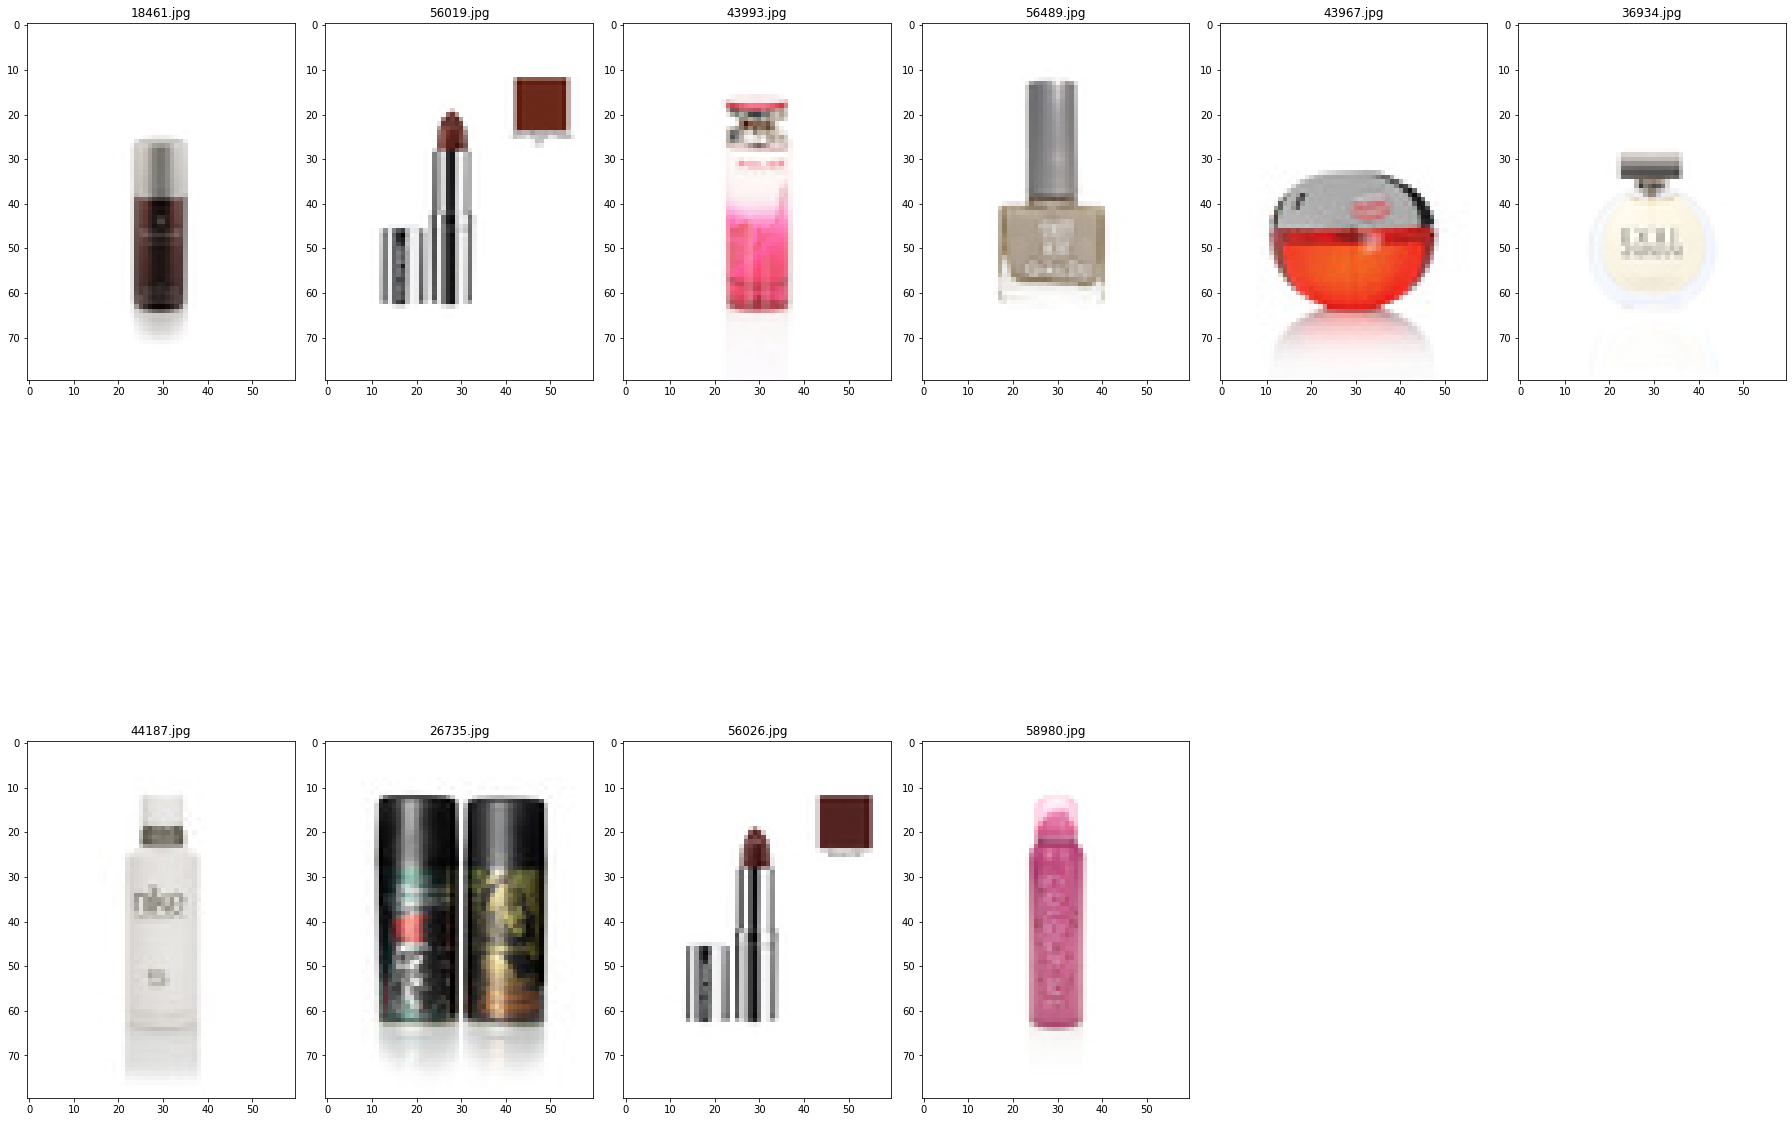

In [12]:
sampleImages = images[0:10]

fig = plt.figure()
fig.set_figheight(50)
fig.set_figwidth(25)
axis = []
row = len(sampleImages)//2
col = row + 1

index = 0
for i in range(len(list_dir)):
    if list_dir[i] == 'images':
        index = i
        break

for i in range (len(sampleImages)):
    image_path=DATASET_PATH+list_dir[index]+"/"+sampleImages[i]
    src = cv2.imread(image_path)
    image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB) 
    axis.append(fig.add_subplot(row, col, i+1))
    subplot_title=sampleImages[i]
    axis[-1].set_title(subplot_title)  
    plt.imshow(image)

fig.tight_layout()
plt.show()

In [13]:
augmentedDataframe = pd.DataFrame({
    'filename': dataset['image'],
    'type': dataset['product_type']
})

total_row = len(augmentedDataframe)
print(total_row)
augmentedDataframe.head(10)

2403


,filename,type
0,18461.jpg,Deodorant
1,56019.jpg,Lipstick
2,43993.jpg,Perfume and Body Mist
3,56489.jpg,Nail Polish
4,43967.jpg,Perfume and Body Mist
5,36934.jpg,Perfume and Body Mist
6,44187.jpg,Perfume and Body Mist
7,26735.jpg,Deodorant
8,56026.jpg,Lipstick
9,58980.jpg,Deodorant


In [14]:
unique_types = augmentedDataframe['type'].unique().tolist()
print(unique_types)
total_class = len(unique_types)
print(total_class)
print(unique_types[0])
print(unique_types.index(unique_types[0]))
augmentedDataframe['number_type'] = augmentedDataframe['type'].apply(lambda x: unique_types.index(x) if x in unique_types else 0)
augmentedDataframe.head(10)

['Deodorant', 'Lipstick', 'Perfume and Body Mist', 'Nail Polish', 'Lip Gloss', 'Face Wash and Cleanser', 'Foundation and Primer', 'Fragrance Gift Set', 'Highlighter and Blush', 'Lip Care', 'Face Moisturisers', 'Compact', 'Eye Cream', 'Beauty Accessory', 'Kajal and Eyeliner', 'Lip Liner', 'Eyeshadow', 'Nail Essentials', 'Face Scrub and Exfoliator', 'Mask and Peel', 'Hair Colour', 'Concealer', 'Body Lotion', 'Sunscreen', 'Mascara', 'Toner', 'Makeup Remover', 'Lip Plumper', 'Face Serum and Gel', 'Mens Grooming Kit', 'Body Wash and Scrub']
31
Deodorant
0


,filename,type,number_type
0,18461.jpg,Deodorant,0
1,56019.jpg,Lipstick,1
2,43993.jpg,Perfume and Body Mist,2
3,56489.jpg,Nail Polish,3
4,43967.jpg,Perfume and Body Mist,2
5,36934.jpg,Perfume and Body Mist,2
6,44187.jpg,Perfume and Body Mist,2
7,26735.jpg,Deodorant,0
8,56026.jpg,Lipstick,1
9,58980.jpg,Deodorant,0


In [15]:
dataset['product_type'].value_counts()

Perfume and Body Mist        612
Deodorant                    347
Nail Polish                  329
Lipstick                     315
Lip Gloss                    144
Kajal and Eyeliner           102
Foundation and Primer         76
Face Moisturisers             61
Fragrance Gift Set            57
Highlighter and Blush         53
Compact                       49
Lip Liner                     48
Eyeshadow                     42
Face Wash and Cleanser        28
Sunscreen                     25
Hair Colour                   19
Lip Care                      16
Mascara                       13
Mask and Peel                 12
Concealer                     11
Body Lotion                    6
Eye Cream                      6
Nail Essentials                6
Face Scrub and Exfoliator      5
Toner                          5
Beauty Accessory               4
Makeup Remover                 4
Lip Plumper                    4
Face Serum and Gel             2
Mens Grooming Kit              1
Body Wash 

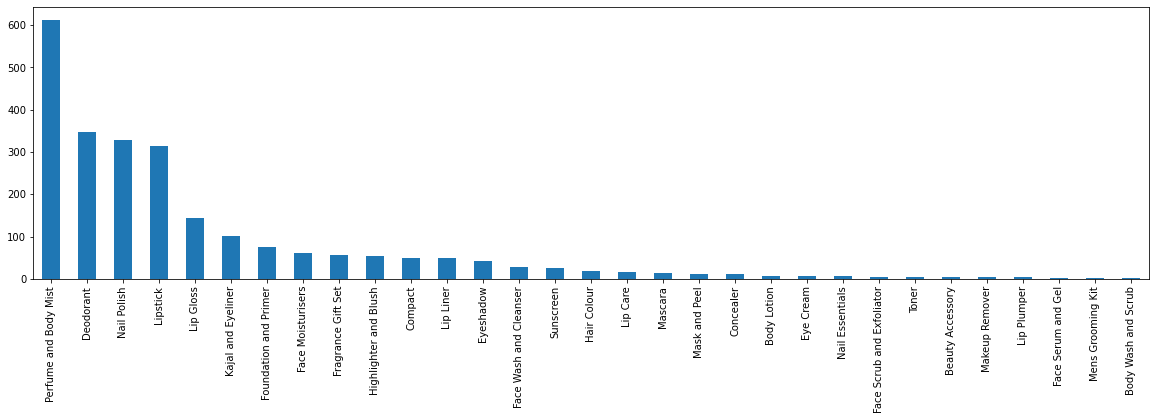

In [16]:
plt.figure(figsize=(20,5))
dataset['product_type'].value_counts().plot(kind='bar',x='category',y='image')
plt.show()

In [17]:
def getData(start, end):
    x_data = []
    y_data = []
    
    for i in range(start, end):
        path = DATASET_PATH + list_dir[index] + "/" + augmentedDataframe.loc[i, 'filename']
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        
        try:
            resized_image = cv2.resize(image, dsize=(28, 28))
        except:
            print("Rejected image: " + augmentedDataframe.loc[i, 'filename'])
            continue
        x_data.append(resized_image)
        y_data.append(augmentedDataframe.loc[i, 'number_type'])
    return x_data, y_data

In [18]:
X = []
Y = []
start = 0
stop = total_row
X, Y = getData(start, stop)

X = np.array(X).reshape(-1, 28, 28, 1)
Y = np.array(Y)

X = X/255

Y = Y.reshape(len(X),)

In [19]:
print('Image Data Shape: ',X.shape)
print('Label Data Shape: ',Y.shape)

Image Data Shape:  (2403, 28, 28, 1)
Label Data Shape:  (2403,)


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 500)

In [22]:
print('Train Image Data Shape: ',X_train.shape)
print('Train Label Data Shape: ',Y_train.shape)
print('Test Image Data Shape: ',X_test.shape)
print('Test Label Data Shape: ',Y_test.shape)

Train Image Data Shape:  (2162, 28, 28, 1)
Train Label Data Shape:  (2162,)
Test Image Data Shape:  (241, 28, 28, 1)
Test Label Data Shape:  (241,)


In [23]:
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 500)

In [24]:
print('Train Image Data Shape: ',X_train.shape)
print('Train Label Data Shape: ',Y_train.shape)
print('Validation Image Data Shape: ',X_validate.shape)
print('Validation Label Data Shape: ',Y_validate.shape)

Train Image Data Shape:  (1945, 28, 28, 1)
Train Label Data Shape:  (1945,)
Validation Image Data Shape:  (217, 28, 28, 1)
Validation Label Data Shape:  (217,)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import os
import tensorflow as tf
import datetime, os
from tensorflow.keras.callbacks import TensorBoard

In [26]:
print(total_class)

31


In [83]:
def build_model():
    cnn_model = Sequential()
    cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
    cnn_model.add(Dropout(0.25))

    cnn_model.add(Flatten())
    cnn_model.add(Dense(units = 512, activation = 'relu'))
    cnn_model.add(Dropout(0.25))
    cnn_model.add(Dense(units = total_class, activation = 'softmax'))
    return cnn_model

In [84]:
model = build_model()

In [85]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)        

In [86]:
def train_model(model):
    model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])
    history = model.fit(X_train, Y_train, batch_size = 128, epochs = 150, verbose = 1, validation_data = (X_validate, Y_validate))
    model.fit(X_train, Y_train, epochs=50, batch_size=512, validation_split=0.2)

In [87]:
train_model(model)

Epoch 1/150
16/16 [==============================] - 1s 44ms/step - loss: 2.7503 - accuracy: 0.1943 - val_loss: 2.5451 - val_accuracy: 0.2903
Epoch 2/150
16/16 [==============================] - 1s 37ms/step - loss: 2.5016 - accuracy: 0.2458 - val_loss: 2.4919 - val_accuracy: 0.2903
Epoch 3/150
16/16 [==============================] - 1s 38ms/step - loss: 2.4796 - accuracy: 0.2478 - val_loss: 2.5124 - val_accuracy: 0.2903
Epoch 4/150
16/16 [==============================] - 1s 38ms/step - loss: 2.4459 - accuracy: 0.2591 - val_loss: 2.4541 - val_accuracy: 0.3733
Epoch 5/150
16/16 [==============================] - 1s 37ms/step - loss: 2.3868 - accuracy: 0.2889 - val_loss: 2.3700 - val_accuracy: 0.3779
Epoch 6/150
16/16 [==============================] - 1s 37ms/step - loss: 2.3185 - accuracy: 0.3064 - val_loss: 2.2553 - val_accuracy: 0.4009
Epoch 7/150
16/16 [==============================] - 1s 37ms/step - loss: 2.2726 - accuracy: 0.3234 - val_loss: 2.0791 - val_accuracy: 0.4516
Epoch 

16/16 [==============================] - 1s 36ms/step - loss: 0.5677 - accuracy: 0.8237 - val_loss: 0.7115 - val_accuracy: 0.8249
Epoch 59/150
16/16 [==============================] - 1s 38ms/step - loss: 0.5828 - accuracy: 0.8201 - val_loss: 0.7336 - val_accuracy: 0.8065
Epoch 60/150
16/16 [==============================] - 1s 37ms/step - loss: 0.5596 - accuracy: 0.8175 - val_loss: 0.7051 - val_accuracy: 0.8203
Epoch 61/150
16/16 [==============================] - 1s 36ms/step - loss: 0.5619 - accuracy: 0.8272 - val_loss: 0.7406 - val_accuracy: 0.8203
Epoch 62/150
16/16 [==============================] - 1s 37ms/step - loss: 0.5709 - accuracy: 0.8175 - val_loss: 0.7371 - val_accuracy: 0.8295
Epoch 63/150
16/16 [==============================] - 1s 36ms/step - loss: 0.5380 - accuracy: 0.8278 - val_loss: 0.7474 - val_accuracy: 0.8111
Epoch 64/150
16/16 [==============================] - 1s 37ms/step - loss: 0.5509 - accuracy: 0.8206 - val_loss: 0.7289 - val_accuracy: 0.8295
Epoch 65/150

16/16 [==============================] - 1s 39ms/step - loss: 0.2797 - accuracy: 0.9064 - val_loss: 0.8046 - val_accuracy: 0.8157
Epoch 116/150
16/16 [==============================] - 1s 38ms/step - loss: 0.2778 - accuracy: 0.9049 - val_loss: 0.8464 - val_accuracy: 0.8111
Epoch 117/150
16/16 [==============================] - 1s 38ms/step - loss: 0.2713 - accuracy: 0.9105 - val_loss: 0.8235 - val_accuracy: 0.8203
Epoch 118/150
16/16 [==============================] - 1s 39ms/step - loss: 0.2667 - accuracy: 0.9111 - val_loss: 0.8112 - val_accuracy: 0.8249
Epoch 119/150
16/16 [==============================] - 1s 36ms/step - loss: 0.3019 - accuracy: 0.8967 - val_loss: 0.8403 - val_accuracy: 0.8157
Epoch 120/150
16/16 [==============================] - 1s 37ms/step - loss: 0.3003 - accuracy: 0.8931 - val_loss: 0.7986 - val_accuracy: 0.8249
Epoch 121/150
16/16 [==============================] - 1s 36ms/step - loss: 0.3037 - accuracy: 0.8987 - val_loss: 0.8785 - val_accuracy: 0.8111
Epoch 

4/4 [==============================] - 0s 113ms/step - loss: 0.2209 - accuracy: 0.9229 - val_loss: 0.1411 - val_accuracy: 0.9486
Epoch 23/50
4/4 [==============================] - 1s 122ms/step - loss: 0.2550 - accuracy: 0.9248 - val_loss: 0.1259 - val_accuracy: 0.9589
Epoch 24/50
4/4 [==============================] - 0s 113ms/step - loss: 0.2528 - accuracy: 0.9087 - val_loss: 0.1218 - val_accuracy: 0.9589
Epoch 25/50
4/4 [==============================] - 0s 114ms/step - loss: 0.2017 - accuracy: 0.9280 - val_loss: 0.1330 - val_accuracy: 0.9640
Epoch 26/50
4/4 [==============================] - 0s 116ms/step - loss: 0.2283 - accuracy: 0.9299 - val_loss: 0.1441 - val_accuracy: 0.9589
Epoch 27/50
4/4 [==============================] - 0s 113ms/step - loss: 0.2163 - accuracy: 0.9274 - val_loss: 0.1414 - val_accuracy: 0.9563
Epoch 28/50
4/4 [==============================] - 0s 112ms/step - loss: 0.2099 - accuracy: 0.9351 - val_loss: 0.1419 - val_accuracy: 0.9563
Epoch 29/50
4/4 [========

Text(0.5, 1.0, 'Accuracy evolution')

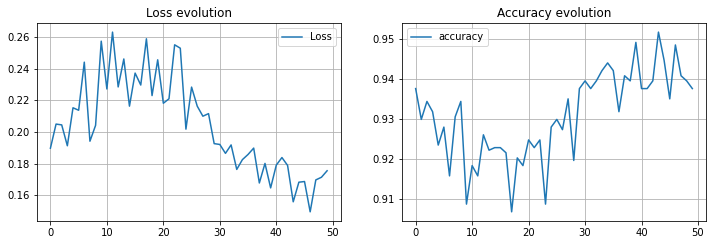

In [88]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(model.history.history['loss'], label='Loss')
# plt.plot(model.history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(model.history.history['accuracy'], label='accuracy')
# plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [89]:
model.save('visual_product_recommend.h5')

In [90]:
from keras import models

In [91]:
model = models.load_model('visual_product_recommend.h5')

In [92]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

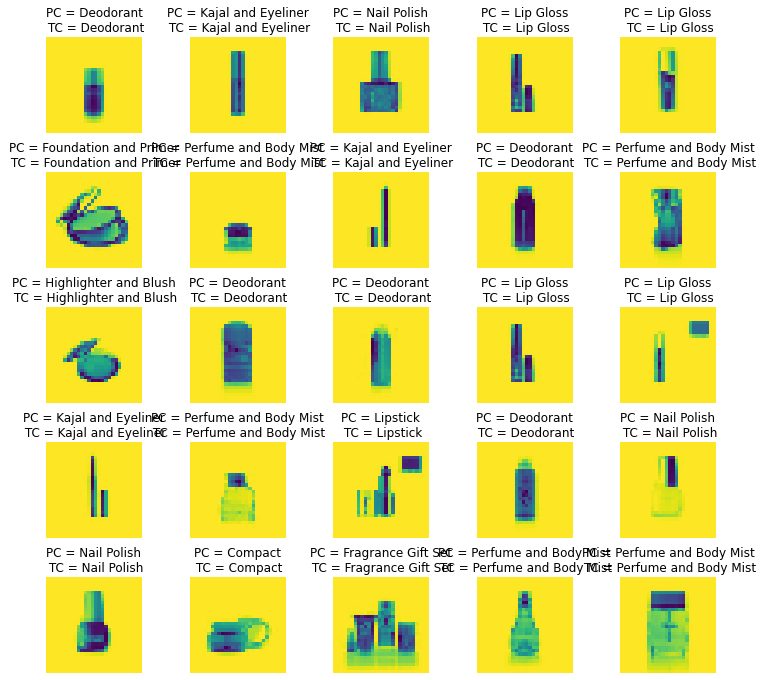

In [93]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"PC = {unique_types[classes_x[i]]}\n TC = {unique_types[Y_test[i]]}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [94]:
def load_image(i):
    Image_path=DATASET_PATH+list_dir[index]+"/"+augmentedDataframe.loc[i,'filename']
    Image_id=augmentedDataframe.loc[i,'filename'].split(".")
    res=Image_id[0]
    image = cv2.imread(Image_path,cv2.IMREAD_COLOR)
    resized_img = cv2.resize(image, dsize=(224, 224))
    return resized_img,res

(224, 224, 3)


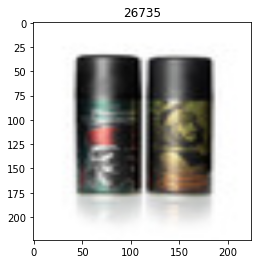

In [96]:
img,img_id = load_image(7)
print(img.shape)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.title(img_id)
plt.imshow(img)

In [97]:
def make_prediction(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    resized_img = cv2.resize(img, dsize=(28, 28))
    x_data = np.array(resized_img).reshape(-1, 28,28,1)
    x_data=x_data/255
    print(x_data)
    print(x_data.shape)
    result=model.predict(x_data)
    print(type(result))
    print(np.argmax(result))
    return x_data,unique_types[np.argmax(result)]
    

In [98]:
numpy_image,result=make_prediction(img)
print(result)

[[[[1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]]

  [[1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [1.        ]
   [

In [99]:
typeList=[]
for i, row in dataset.iterrows(): 
    if(row["product_type"]==result):
        if(img_id!=str(row["id"])):
            typeList.append(row['id'])

In [100]:
print(typeList)

[18461, 58980, 58974, 46624, 43994, 28238, 58987, 18459, 26732, 28231, 44384, 58989, 28236, 44383, 44377, 36565, 46646, 43106, 22555, 28262, 46641, 28265, 32530, 28253, 59002, 44127, 59005, 28254, 28237, 25984, 58988, 36564, 44382, 28230, 44385, 58986, 18458, 26733, 44949, 28239, 18460, 58975, 46625, 26734, 58981, 28255, 59004, 32531, 59003, 28252, 46649, 22553, 43100, 52871, 28264, 46647, 22554, 28263, 44096, 52751, 45715, 44054, 45770, 27304, 44007, 23553, 23598, 54062, 54063, 54064, 23564, 44039, 27305, 23597, 45771, 27327, 45566, 45762, 56375, 23584, 23583, 27311, 45765, 44041, 55568, 27380, 59951, 23549, 45764, 23582, 27328, 45763, 23547, 45567, 27326, 44049, 27381, 59950, 59961, 55569, 28241, 22549, 46665, 28246, 46662, 28270, 46654, 46653, 28248, 44150, 46297, 46899, 28223, 44953, 44391, 32547, 20076, 58950, 44954, 28224, 58992, 46636, 44161, 46897, 46631, 28215, 32549, 23609, 26743, 46652, 28249, 28271, 46655, 26744, 28247, 46663, 22548, 28240, 26781, 46630, 28214, 46637, 58958

In [101]:
i=0
X_similar=[]
X_id_similar=[]
X_numpy=[]
for imageId in typeList:
#     print(imageId)
    Image_path=DATASET_PATH+list_dir[index]+"/"+str(imageId)+".jpg"
    image = cv2.imread(Image_path,cv2.IMREAD_GRAYSCALE)
    try:
        resized_img = cv2.resize(image, dsize=(28,28))
    except:
        print("can't read file: ", str(imageId)+".jpg")
    X_similar.append(resized_img)
    X_id_similar.append(imageId)
        
        
X_numpy = np.array(X_similar).reshape(-1, 28,28,1)
X_numpy = X_numpy/255
#print(X_numpy[0])
    

Text(0.5, 1.0, '18461')

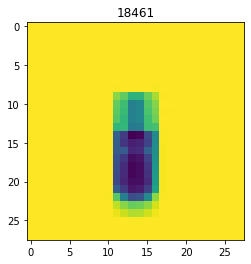

In [102]:
plt.imshow(X_similar[0])
plt.title(X_id_similar[0])

In [103]:
import math
def calculateDistance(i1, i2):
    return math.sqrt(np.sum((i1-i2)**2))

In [104]:
print(calculateDistance(numpy_image,X_numpy[0]))

11.162256527264953


In [105]:
distance_list=[]
for i in range (0, len(X_numpy)):
    distance_list.append(calculateDistance(numpy_image,X_numpy[i]))

sorted_distance_list=distance_list.copy()
#print(distance_list)
sorted_distance_list.sort()

least_ten_distance=sorted_distance_list[0:10]
print(least_ten_distance)
index_distance=[]
for i in range (0, len(least_ten_distance)-1):
    if(least_ten_distance[i]!=least_ten_distance[i+1]):
        index_distance.append(distance_list.index(least_ten_distance[i]))

# index_distance=index_distance[0:5]

print(index_distance)

[5.9186371136084714, 6.172398284030387, 6.513357168701422, 6.741679480258081, 6.796946189918714, 6.834151074934814, 7.228913707270186, 7.554257413867438, 7.7243006947300215, 7.804114688713044]
[111, 22, 239, 242, 219, 53, 306, 269, 240]


18461
58980
58974
46624
43994
28238
58987
18459
26732


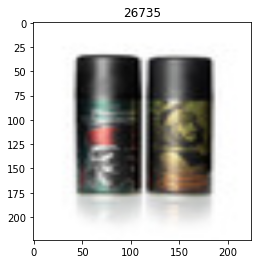

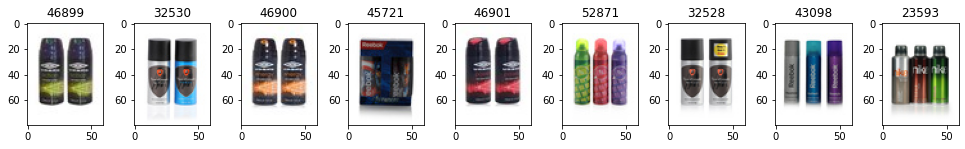

In [106]:
plt.imshow(img)
plt.title(img_id)

fig=plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
axis=[]
for i in range(0,len(index_distance)):
    print(X_id_similar[i])
    Image_path=DATASET_PATH+list_dir[index]+"/"+str(X_id_similar[index_distance[i]])+".jpg"
    src = cv2.imread(Image_path)
    image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB) 
    axis.append(fig.add_subplot(1,10, i+1))
    subplot_title=str(X_id_similar[index_distance[i]])
    axis[-1].set_title(subplot_title)  
    plt.imshow(image)

fig.tight_layout()
plt.show()
    